# imports

In [1]:
import pandas as pd
import numpy as np
import ast
from functions import *
import matplotlib.pyplot as plt
from matplotlib import cm

# fix nested lists

In [12]:
def convert_to_floats(value):
    if value[:2] == '[[':
        nested_list = ast.literal_eval(value)
        return [item[0] for item in nested_list]
    return value  # Return the original value if not a string

def printer(value):
    if value[:2] == '[[':
        print(value)
        print()
    return value


df = pd.read_csv('data.csv')


df['probability'] = df['probability'].apply(convert_to_floats)

df.to_csv('data.csv', index=False)

# Plot thermal noisy data

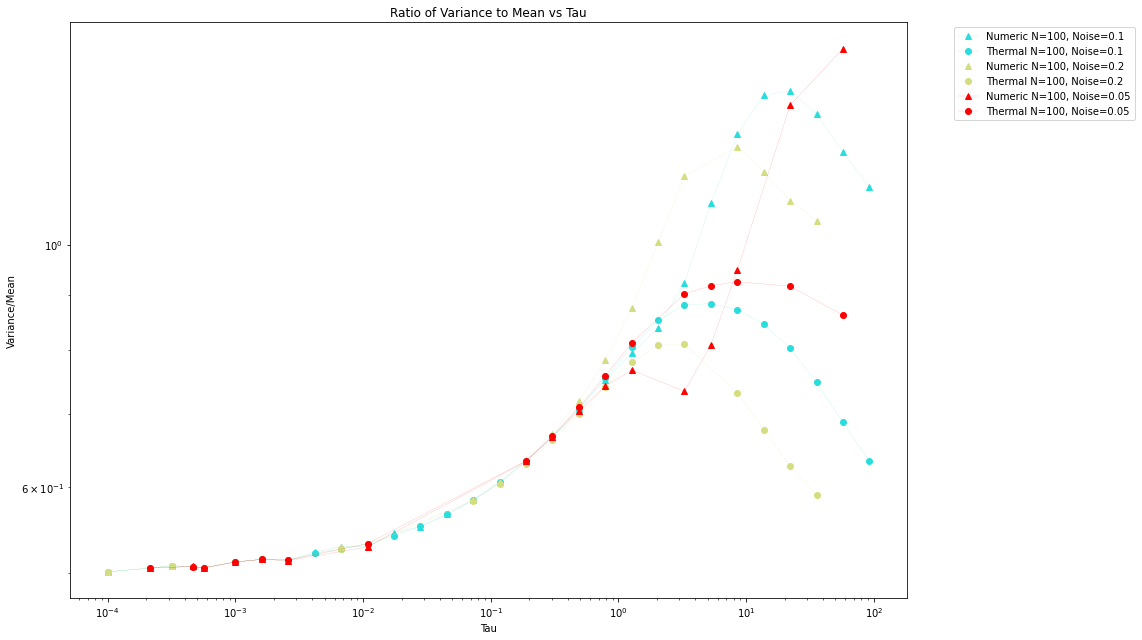

In [46]:
# Load the data from the CSV file
N = 100
data = get_data_in_range(N, 0, 100, 0.05, 0.2)
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels) + 1)) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data = data[(data['type'] == 'thermal') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio = thermal_data['variance'] / thermal_data['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy+1], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=0.1, markersize=6)
    plt.plot(thermal_data['tau'], thermal_ratio, color=colors[idy+1], label=f'Thermal N={N}, Noise={noise}', marker='o', linewidth=0.1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


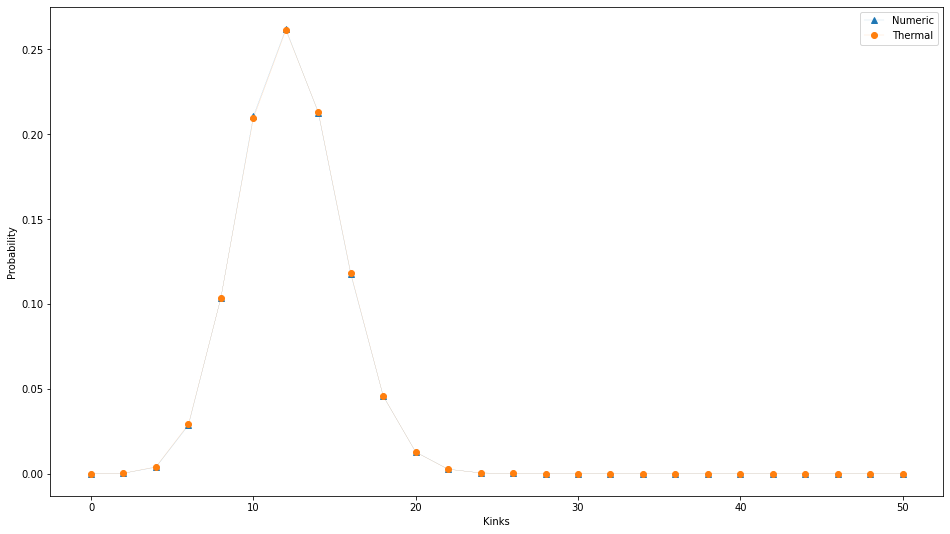

In [45]:
# Load the data from the CSV file
N = 50
data = get_data_in_range(N, 0.5, 10 , 0.1, 0.1)
num_prob = np.array(ast.literal_eval(data[data['type'] == 'numeric']['probability'].iloc[0])).flatten()
thermal_prob = np.array(ast.literal_eval(data[data['type'] == 'thermal']['probability'].iloc[0])).flatten()
kinks = [i*2 for i in range(len(num_prob))]
plt.figure(figsize=(16, 9))
plt.plot(kinks, num_prob, label='Numeric', marker='^', linewidth=0.1, markersize=6)
plt.plot(kinks, thermal_prob, label='Thermal', marker='o', linewidth=0.1, markersize=6)
plt.xlabel('Kinks')
plt.ylabel('Probability')
plt.legend()
plt.show()

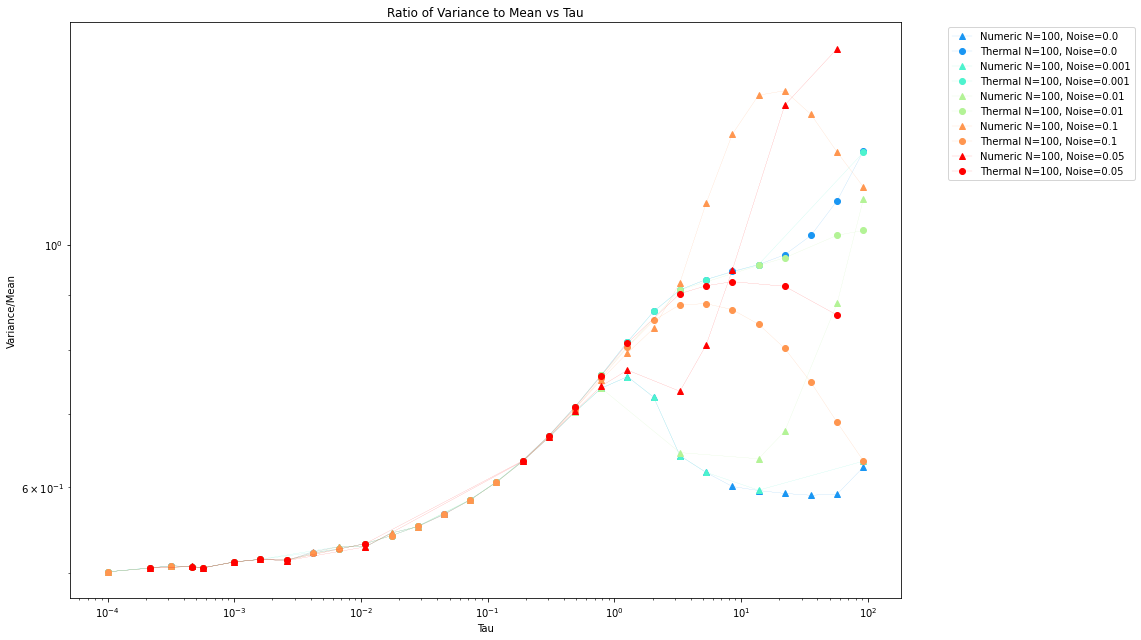

In [49]:
# Load the data from the CSV file
N = 100
data = get_data_in_range(N, 0, 100, 0, 0.1)
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels) + 1)) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data = data[(data['type'] == 'thermal') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio = thermal_data['variance'] / thermal_data['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy+1], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=0.1, markersize=6)
    plt.plot(thermal_data['tau'], thermal_ratio, color=colors[idy+1], label=f'Thermal N={N}, Noise={noise}', marker='o', linewidth=0.1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()
